### S09T01 Training and Test Sets - Exercise 2 and 3

### - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [31]:
# open dataset from previous exercise
# this is the file with the data cleaned (we have droped some of the columns and handled missing values)
# this is explained in previous notebook 
# this file is before splitting between train and test, it contains all of the observations
data = pd.read_csv('data.csv')
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
0,-14.0,128.0,150.0,116.0,8.0,810,418.97,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2003.0,1955,2211.0,2225,1,3,4,WN,IAD,TPA
1,2.0,128.0,145.0,113.0,19.0,810,430.09,5.0,10.0,0.0,0.0,0.0,0.0,0.0,754.0,735,1002.0,1000,1,3,4,WN,IAD,TPA
2,14.0,96.0,90.0,76.0,8.0,515,406.58,3.0,17.0,0.0,0.0,0.0,0.0,0.0,628.0,620,804.0,750,1,3,4,WN,IND,BWI
3,34.0,90.0,90.0,77.0,34.0,515,401.30,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1829.0,1755,1959.0,1925,1,3,4,WN,IND,BWI
4,11.0,101.0,115.0,87.0,25.0,688,474.48,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1940.0,1915,2121.0,2110,1,3,4,WN,IND,JAX


In [32]:
data.shape

(1928255, 24)

#### Creation of dummy columns 

First, we will create a categorical column for 'ArrDelay'. 

In [33]:
def delay_interval(x): 
    if x < 15: 
        return "Less than 15"
    elif x < 30: 
        return "Between 15 and 30"
    elif x < 60: 
        return "Between 30 and 60"
    else: 
        return "More than 60"

data['DelayInterval'] = data['ArrDelay'].apply(delay_interval)
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,DelayInterval
0,-14.0,128.0,150.0,116.0,8.0,810,418.97,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2003.0,1955,2211.0,2225,1,3,4,WN,IAD,TPA,Less than 15
1,2.0,128.0,145.0,113.0,19.0,810,430.09,5.0,10.0,0.0,0.0,0.0,0.0,0.0,754.0,735,1002.0,1000,1,3,4,WN,IAD,TPA,Less than 15
2,14.0,96.0,90.0,76.0,8.0,515,406.58,3.0,17.0,0.0,0.0,0.0,0.0,0.0,628.0,620,804.0,750,1,3,4,WN,IND,BWI,Less than 15
3,34.0,90.0,90.0,77.0,34.0,515,401.30,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1829.0,1755,1959.0,1925,1,3,4,WN,IND,BWI,Between 30 and 60
4,11.0,101.0,115.0,87.0,25.0,688,474.48,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1940.0,1915,2121.0,2110,1,3,4,WN,IND,JAX,Less than 15


We now have 4 categorical columns: UniqueCarrier','Origin', 'Dest'and 'DelayInterval': 

+ For UniqueCarrier','Origin', 'Dest' : the character os these variables is not ordinal, so we´ll use hot encoding.
+ 'DelayInterval' column is an ordinal variable, so we´ll manually map it. 

In [34]:
# we´ll use the param drop first = True so we don t have more duplicated information 
data = pd.get_dummies(data = data, columns = ['UniqueCarrier','Origin', 'Dest'], drop_first= True, dtype = 'uint8')

In [35]:
data.shape

(1928255, 644)

We have now 644 columns (620 more than before!!) . We can see that dummies have increased the number of columns dramatically, since the number of categories for Origin and Dest is quite big. Now we´ll manually map 'DelayInterval': 

In [36]:
data['DelayInterval'] = data['DelayInterval'].map({"Less than 15": 0, "Between 15 and 30": 1, 
                         "Between 30 and 60" : 2, "More than 60": 3})
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,De

#### Polynomial features 

Polynomial features are very useful when linear regression is not able to capture a pattern, since they are created by raising the variables to a certain degree, this may cause to uncover some relationships between the features and the target. 


Previously, during our descriptive analysis we saw that DepDelay had a very linear relationship with ArrDelay, so we´ll choose other variables that are not so linearly correlated with the target to apply this. 

For instance we can choose features like Distance, ActualElapsedTime and AirTime. 



In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

poly_features = data[['ActualElapsedTime', 'AirTime', 'Distance']]
poly_features.shape

(1928255, 3)

In [38]:
# choose a degree of 2 
polynomial = preprocessing.PolynomialFeatures(degree = 2 )
polynomial.fit(poly_features)

PolynomialFeatures()

In [39]:
polynomial_ = polynomial.transform(poly_features)
polynomial_.shape

(1928255, 10)

In [40]:
polynomial_

array([[1.00000e+00, 1.28000e+02, 1.16000e+02, ..., 1.34560e+04,
        9.39600e+04, 6.56100e+05],
       [1.00000e+00, 1.28000e+02, 1.13000e+02, ..., 1.27690e+04,
        9.15300e+04, 6.56100e+05],
       [1.00000e+00, 9.60000e+01, 7.60000e+01, ..., 5.77600e+03,
        3.91400e+04, 2.65225e+05],
       ...,
       [1.00000e+00, 1.62000e+02, 1.22000e+02, ..., 1.48840e+04,
        8.40580e+04, 4.74721e+05],
       [1.00000e+00, 1.15000e+02, 8.90000e+01, ..., 7.92100e+03,
        4.74370e+04, 2.84089e+05],
       [1.00000e+00, 1.23000e+02, 1.04000e+02, ..., 1.08160e+04,
        9.08960e+04, 7.63876e+05]])

In [41]:
polynomial_.shape[1]

10

Choosing a degree of 2 has increased our fetures from 3 to 10. 

In [42]:
# if we choose a degree of 3
polynomial3 = preprocessing.PolynomialFeatures(degree = 3 )
polynomial3.fit(poly_features)

PolynomialFeatures(degree=3)

In [43]:
polynomial3_ = polynomial3.transform(poly_features)
polynomial3_.shape

(1928255, 20)

Now from 3 initial features we have 20!!

In [44]:
polynomial3_

array([[1.00000000e+00, 1.28000000e+02, 1.16000000e+02, ...,
        1.08993600e+07, 7.61076000e+07, 5.31441000e+08],
       [1.00000000e+00, 1.28000000e+02, 1.13000000e+02, ...,
        1.03428900e+07, 7.41393000e+07, 5.31441000e+08],
       [1.00000000e+00, 9.60000000e+01, 7.60000000e+01, ...,
        2.97464000e+06, 2.01571000e+07, 1.36590875e+08],
       ...,
       [1.00000000e+00, 1.62000000e+02, 1.22000000e+02, ...,
        1.02550760e+07, 5.79159620e+07, 3.27082769e+08],
       [1.00000000e+00, 1.15000000e+02, 8.90000000e+01, ...,
        4.22189300e+06, 2.52839210e+07, 1.51419437e+08],
       [1.00000000e+00, 1.23000000e+02, 1.04000000e+02, ...,
        9.45318400e+06, 7.94431040e+07, 6.67627624e+08]])

In the next exercise we will do a simple example of Polynomial Regression to see how it works. 

#### Standardize numerical data

We will standardize numerical columns but not the ones we have created from categorical columns (these ones are already in dummy format). 



In [65]:
data.columns[:21]

Index(['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth',
       'DayOfWeek'],
      dtype='object')

In [46]:
data_standard = data.copy()

In [67]:
from sklearn.preprocessing import StandardScaler
# we select the columns we want to apply the scaler to: 
standard_cols = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime','DepDelay', 'Distance', 'Speed', 
                'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth','DayOfWeek']

# df with selected columns
standard_features = data_standard[standard_cols]
standard_features.head()

# instantiate scaler object and apply fit and transform
scaler = StandardScaler().fit(standard_features.values)
standard_features = scaler.transform(standard_features.values)

# change our tranformed columns in our data_standard df
data_standard[standard_cols] = standard_features
data_standard.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,De

Later we will have a deeper look to these standardized columns. 

### - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

#### Categorical columns 

We haver created a new column to categorize DelayInterval. 

In [48]:
# 0: less than 15; 1: less than 30;  2: less than 60; 3: More than 60
interval = data['DelayInterval'].value_counts(normalize= True).round(2)
interval

0    0.35
3    0.23
2    0.21
1    0.21
Name: DelayInterval, dtype: float64

+ 35% of flights have no delay or delay is less than 15 minutes 
+ 23% of flights have a delay of more than 60 minutes!!!
+ 21% of flights delay is beween 30 and 60 minutes 
+ The other 21% of flights has a delay between 15 and 30 minutes


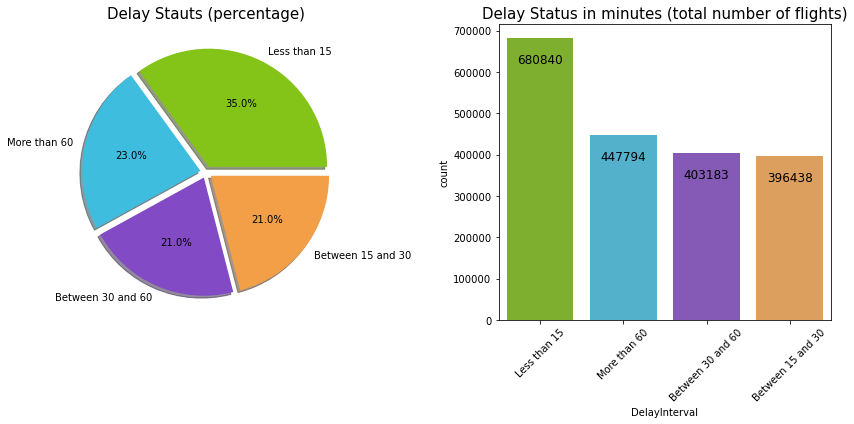

In [49]:
# if we plot this 
group_names = ['Less than 15', 'More than 60', 'Between 30 and 60', 'Between 15 and 30'] 
colors = ['#84c419', '#3fbddf', '#824bc5', '#f29f48']
fig, ax = plt.subplots(1,2, figsize = (12, 6))

interval.plot.pie(explode = [0.05, 0.05, 0.05, 0.05], autopct = '%1.1f%%', ax= ax[0], labels = group_names, 
                                         shadow = True,  colors= colors)
ax[0].set_title('Delay Stauts (percentage)', fontsize = 15)
ax[0].set_ylabel('')

sns.countplot('DelayInterval', data = data_standard, order = interval.index, ax= ax[1], palette = colors)
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='k', size=12)
ax[1].set_title('Delay Status in minutes (total number of flights)', fontsize = 15)
ax[1].set(xticks = range(len(group_names)), xticklabels = [i for i in group_names])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.tight_layout();

Now we can clearly see how the delays are distributed according to the time, more than half of the flights (56%) have a delay of 30 min or less, but 44% of the flights have an Arrival Delay of more than 30 minutes!!

#### Polynomial features

Before we converted 'ActualElapsedTime', 'AirTime' and 'Distance' to polynomial features. To show the effect this can have in a regression model we will do a simple example: we will take 'ActualElapsedTime' and the target variable 'ArrDelay' and we'll compare a Simple Linear Regression and a Polynomial Regression between these two features. 

In [50]:
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,De

In [51]:
 # independent variable ActualElapsedTime
x_elapsed_time = data.iloc[:, 1]
 # dependent variable ArrDelay
y = data.iloc[:, 0]

inds = x_elapsed_time.values.ravel().argsort()
x_elapsed_time = x_elapsed_time.values.ravel()[inds].reshape(-1,1)
y = y.values[inds]

In [52]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_elapsed_time, y)

# in this example we´ll choose a degree of 3
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x_elapsed_time)

poly.fit(x_poly, y)
lin3degree = LinearRegression()
lin3degree.fit(x_poly, y)

LinearRegression()

We can visualize both regressions, Linear and Polynomial: 

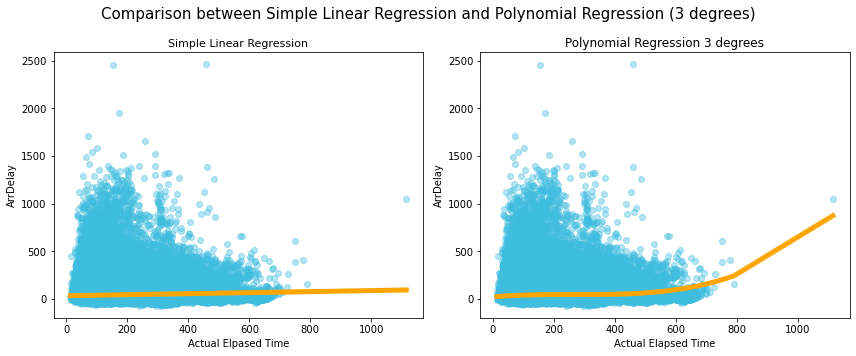

In [53]:
plt.figure(figsize = (12,5))
plt.suptitle('Comparison between Simple Linear Regression and Polynomial Regression (3 degrees)', fontsize = 15)

plt.subplot(121)
plt.scatter(x_elapsed_time, y, color = '#3fbddf', alpha =0.4)
plt.plot(x_elapsed_time, lin.predict(x_elapsed_time), color = 'orange', linewidth = 5)
plt.title('Simple Linear Regression', fontsize = 11)
plt.xlabel('Actual Elpased Time')
plt.ylabel('ArrDelay')

plt.subplot(122)
plt.scatter(x_elapsed_time, y, color = '#3fbddf', alpha = 0.4)
plt.plot(x_elapsed_time, lin3degree.predict(poly.fit_transform(x_elapsed_time)), color = 'orange', linewidth = 5)
plt.title('Polynomial Regression 3 degrees')
plt.xlabel('Actual Elapsed Time')
plt.ylabel('ArrDelay')
plt.tight_layout(); 

We see that in Polynomial Regression the regreesion line bends to try to fit the most possible points, while the Linear Regression is a straight line. 

Now let´s look at R2 in both cases: 

In [54]:
from sklearn.metrics import r2_score

r2 = r2_score(y, lin.predict(x_elapsed_time))
r2

0.004641695217136643

In [55]:
r2_poly = r2_score(y, lin3degree.predict(poly.fit_transform(x_elapsed_time)))
r2_poly                  

0.00630567583065289

The power of prediction of this simple model is almost null but still we got better results with polynomial features than with normal features. 

#### Standardized columns

We have also scaled our features using StandardScaler. Let´s do some descriptive statistics and visualization: 

In [56]:
data_standard.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,De

In [57]:
data_standard[standard_cols].describe().round(2)

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek
count,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.98,-1.66,-2.18,-1.53,-0.70,-1.31,-4.95,-1.30,-1.27,-0.34,-0.14,-0.35,-0.04,-0.46,-3.37,-3.46,-2.94,-3.52,-1.47,-1.68,-1.50
25%,-0.58,-0.74,-0.73,-0.73,-0.58,-0.74,-0.59,-0.53,-0.57,-0.34,-0.14,-0.35,-0.04,-0.46,-0.70,-0.78,-0.54,-0.67,-0.89,-0.88,-0.99
50%,-0.32,-0.24,-0.26,-0.27,-0.36,-0.28,0.09,-0.15,-0.29,-0.34,-0.14,-0.35,-0.04,-0.46,0.06,0.10,0.19,0.15,-0.03,0.03,0.01
75%,0.24,0.44,0.43,0.42,0.19,0.40,0.68,0.23,0.19,-0.07,-0.14,-0.13,-0.04,0.05,0.85,0.82,0.77,0.82,0.83,0.83,1.01
max,42.60,13.61,7.38,14.32,45.51,7.31,7.87,44.35,28.23,66.95,77.67,47.87,240.82,36.18,1.96,2.10,1.44,1.56,1.69,1.74,1.51


+ Since we have standardized the data now has a mean of zero and a standard deviation of one. 
+ At first glance we can already see we have some heavy outliers, max values in columns ArrDelay, DepDelay, TaxiOut, CarrierDelay, WeatherDelay, SecurityDelay... are extremely high if we take into account that we are looking at scaled data!!!
+ In columns that refer to delays, we see that in all cases more than 50% of flights have negative values (values below the mean), which tells us that distributions may be quite right skewed. 


We can do boxplots of some of our standardize features: 

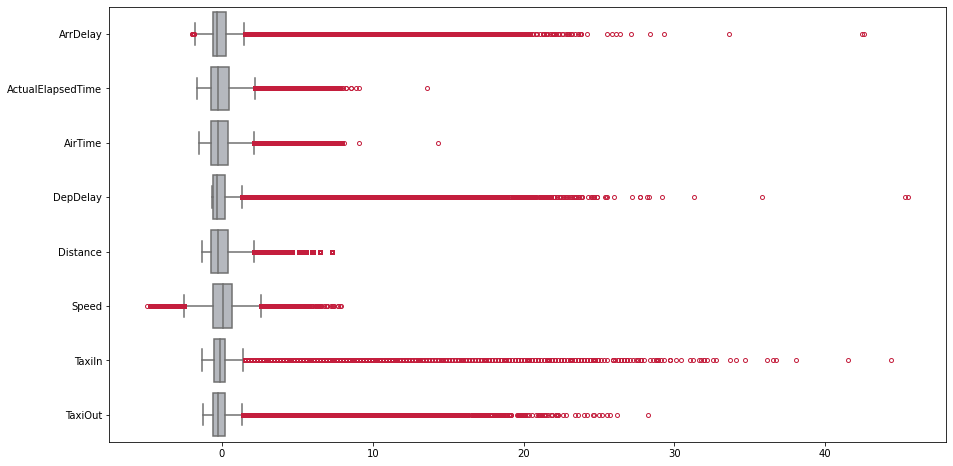

In [58]:
cols = ['ArrDelay', 'ActualElapsedTime', 'AirTime','DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut']

plt.figure(figsize= (15,8))
flierprops = dict(marker='o', markerfacecolor='None', markersize=4,  markeredgecolor='#C41E3D')
sns.boxplot( data = data_standard[cols],  orient = 'h', flierprops = flierprops, color = '#b4b8bf'); 

The outliers are so prominent that boxplots can' t even be seen properly. Most features have all the outliers above the mean but in the case of 'ArrDelay' and 'Speed' we also have outliers as lower values. 

If we look at how they are distributed: 

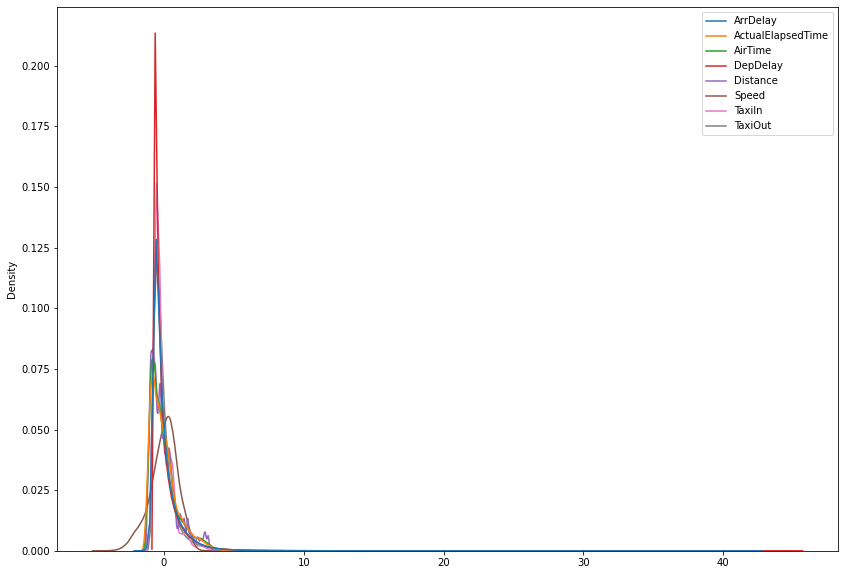

In [59]:
plt.figure(figsize =(14,10))
sns.kdeplot(data = data_standard[cols]); 


In these figure features overlap each other, so let´s compare ArrDelay and DepDelay distributions only to see them more clearly: 

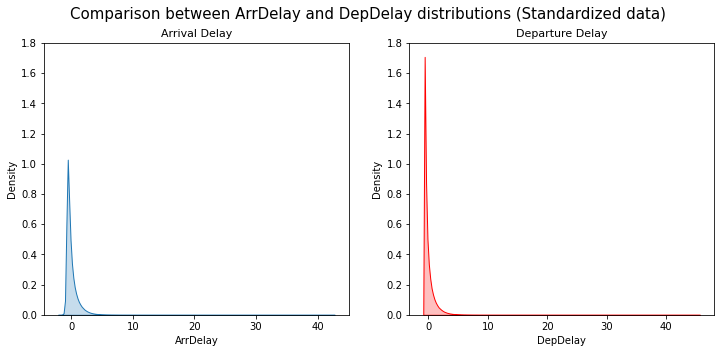

In [68]:
plt.figure(figsize = (12,5))
plt.suptitle('Comparison between ArrDelay and DepDelay distributions (Standardized data)', fontsize = 15)

plt.subplot(121)
sns.kdeplot(data = data_standard['ArrDelay'], fill = True)
plt.xlabel('ArrDelay')
plt.ylim(0, 1.8)
plt.title('Arrival Delay', fontsize = 11)

plt.subplot(122)
sns.kdeplot(data = data_standard['DepDelay'], fill = True, color = 'red')
plt.xlabel('DepDelay')
plt.ylim(0,1.8)
plt.title('Departure Delay', fontsize = 11); 

Both ArrDelay and DepDelay have right skew distributions and values concentrated around low values but with the presence of big outliers. Data seems more concentrated on DepDelay and a little more dispersed in ArrDelay. 

In [61]:
# we save the file data for the next exercise 
data.to_csv('data_dummies.csv', index = False)